In [1]:
#Import libraries

#Sci-kit Learn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Boosting models
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error as MAE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#Scipy
from scipy.stats import kurtosis
from scipy.stats import chi2_contingency

#Matplotlib
import matplotlib.pyplot as plt

#Numpy
import numpy as np

In [3]:
#Load the data
sales_data = pd.read_csv("sales.csv")

# Exploratory Data Analysis

In [6]:
#Preview the dataset 
sales_data.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [8]:
rows = sales_data.shape[0]
columns = sales_data.shape[1]

print(f"The sales.csv data has {rows} rows and {columns} columns.")

The sales.csv data has 640840 rows and 10 columns.


In [10]:
#Check for data types in the dataframe
sales_data.dtypes

Unnamed: 0              int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

The object dtypes found in the dataset need encoding for model use.

In [13]:
#Check for NULL values in the dataset
sales_data.isnull().sum()

Unnamed: 0             0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

No NULL value were found in the dataset

In [16]:
#Get unique values of the data
for col in sales_data.columns:
    unique_vals = sales_data[col].unique()
    if len(unique_vals) <= 10:
        print(f"{col}: {unique_vals}")
    else:
        print(f"{col} column has more than 10 unique values")

Unnamed: 0 column has more than 10 unique values
store_ID column has more than 10 unique values
day_of_week: [4 6 2 7 3 5 1]
date column has more than 10 unique values
nb_customers_on_day column has more than 10 unique values
open: [1 0]
promotion: [0 1]
state_holiday: ['0' 'a' 'c' 'b']
school_holiday: [0 1]
sales column has more than 10 unique values


Upon further evaluation of the unqiue values each column has, 6 of them seem to be multi-categorical, while only three are binary categorical (promotion, open, and school_holiday)

In [19]:
#Perform Descriptive Statistics-Numericals
#Mean
mean_customers_on_day = sales_data.groupby('day_of_week')['nb_customers_on_day'].mean()

#Median
median_customers_on_day = sales_data.groupby('day_of_week')['nb_customers_on_day'].median()

#Max
max_customers_on_day = sales_data.groupby('day_of_week')['nb_customers_on_day'].max()

#Standard Deviation
std_customers_on_day = sales_data.groupby('day_of_week')['nb_customers_on_day'].std()

#Kurtosis
kurtosis_customers_on_day = sales_data.groupby('day_of_week')['nb_customers_on_day'].apply(kurtosis)

#Print results
print(f"Average Number of Customers per Day of the Week: {mean_customers_on_day}\n")

print(f"Medium Number of Customers per Day of the Week: {median_customers_on_day}\n")

print(f"Maximum Number of Customers per Day of the Week: {max_customers_on_day}\n")

print(f"Standard Deviation of Customers per Day of the Week: {std_customers_on_day}\n")

print(f"Kurtosis of Customers per Day of the Week: {kurtosis_customers_on_day}\n")

Average Number of Customers per Day of the Week: day_of_week
1    812.724473
2    761.313712
3    721.166916
4    698.434165
5    742.724348
6    657.270157
7     36.959956
Name: nb_customers_on_day, dtype: float64

Medium Number of Customers per Day of the Week: day_of_week
1    748.0
2    681.0
3    651.0
4    646.0
5    682.0
6    571.0
7      0.0
Name: nb_customers_on_day, dtype: float64

Maximum Number of Customers per Day of the Week: day_of_week
1    5387
2    4547
3    4238
4    5297
5    5458
6    4762
7    5145
Name: nb_customers_on_day, dtype: int64

Standard Deviation of Customers per Day of the Week: day_of_week
1    448.602468
2    395.185569
3    383.504804
4    417.323643
5    409.237651
6    388.711789
7    288.831264
Name: nb_customers_on_day, dtype: float64

Kurtosis of Customers per Day of the Week: day_of_week
1      7.844098
2     10.646378
3     11.473193
4      9.732897
5     12.995626
6     13.819838
7    105.674158
Name: nb_customers_on_day, dtype: float64



## Customer Data Analysis

* Note: Monday is considered the first day of the week to align with business practices, where the workweek typically begins on Monday.

These descriptive statistics on the customer data reveals key weekly trends. Monday sees the highest average customer count (813), followed by Tuesday (761) and Friday (743), while Sunday has a significantly lower average of 37. The median values are similar to the means, except Sunday, where the median is 0, suggesting sparse activity. Maximum customer counts fluctuate, with Friday peaking at 5,458 and Sunday at 5,145, indicating occasional high traffic even on typically low-traffic days.

Standard deviations range from 289 on Sunday to 449 on Monday, indicating variability. High kurtosis values, especially on Sunday (105.67), suggest heavy-tailed distributions and potential outliers.

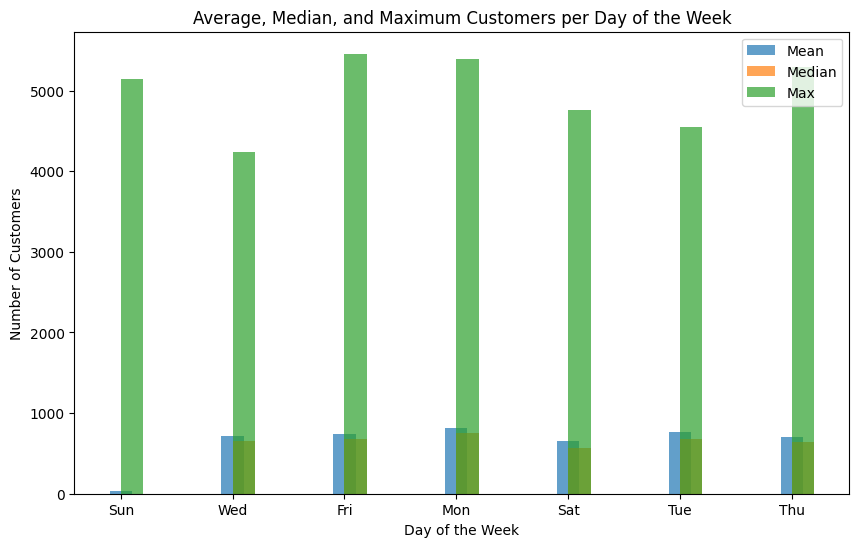

In [22]:
#Plot numericals
day_of_week = sales_data['day_of_week'].unique()

#Mean, Median, Max
plt.figure(figsize=(10,6))
plt.bar(day_of_week, mean_customers_on_day, width=0.2, label='Mean', align='center', alpha=0.7)
plt.bar(day_of_week, median_customers_on_day, width=0.2, label='Median', align='edge', alpha=0.7)
plt.bar(day_of_week, max_customers_on_day, width=0.2, label='Max', align='edge', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.title('Average, Median, and Maximum Customers per Day of the Week')
plt.xticks(day_of_week, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.show()

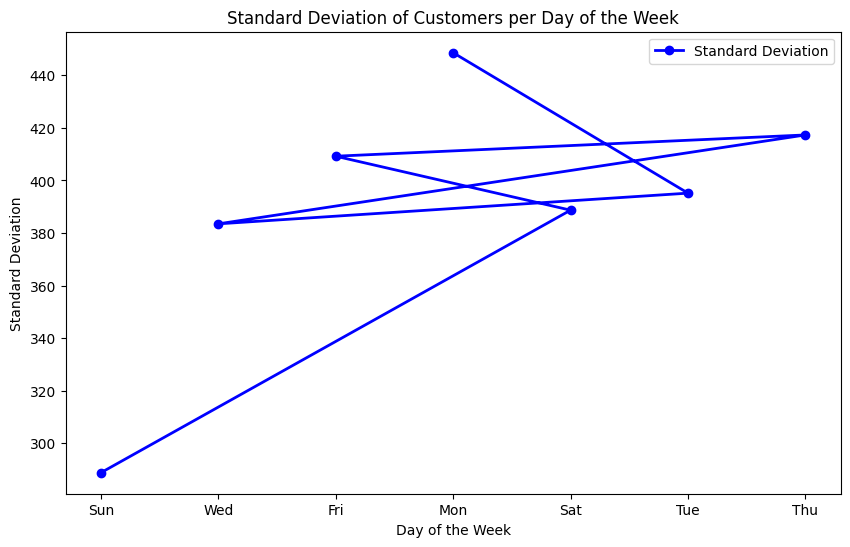

In [24]:
#Standard Deviation
plt.figure(figsize=(10,6))
plt.plot(day_of_week, std_customers_on_day, marker='o', color='blue', label='Standard Deviation', linewidth=2)
plt.xlabel('Day of the Week')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Customers per Day of the Week')
plt.xticks(day_of_week, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.show()

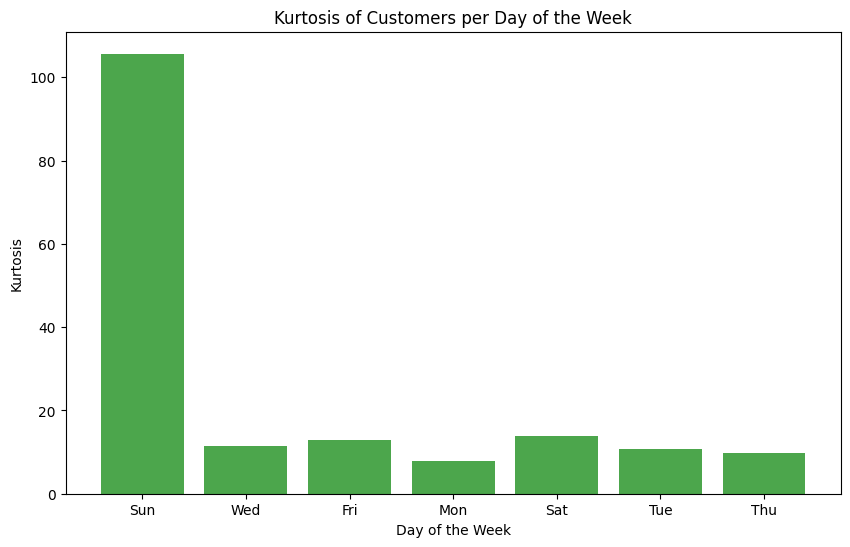

In [26]:
#Kurtosis
plt.figure(figsize=(10,6))
plt.bar(day_of_week, kurtosis_customers_on_day, color='green', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Customers per Day of the Week')
plt.xticks(day_of_week, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [28]:
#Perform Descriptive Statistics-Categoricals
#Binary categoricals
for col in sales_data.columns:
    unique_vals = sales_data[col].unique()
    if len(unique_vals) == 2:
        frequency = sales_data[col].value_counts()
        #Get percentages for better visualiztion
        total = sales_data[col].count()
        percentage = (frequency / total) * 100
        print(f"{col}")
        print(f"Frequency: {frequency} {round(percentage, 1)} \n")

open
Frequency: open
1    532016
0    108824
Name: count, dtype: int64 open
1    83.0
0    17.0
Name: count, dtype: float64 

promotion
Frequency: promotion
0    396220
1    244620
Name: count, dtype: int64 promotion
0    61.8
1    38.2
Name: count, dtype: float64 

school_holiday
Frequency: school_holiday
0    526468
1    114372
Name: count, dtype: int64 school_holiday
0    82.2
1    17.8
Name: count, dtype: float64 



In [30]:
#Multiclass categoricals
for col in sales_data.columns:
    unique_vals = sales_data[col].unique()
    if len(unique_vals) > 2:
        frequency = sales_data[col].value_counts()
        print(f"{col}: Top 5 frequencies\n")
        print(frequency.head(5)) 

Unnamed: 0: Top 5 frequencies

Unnamed: 0
425390    1
470563    1
581093    1
449511    1
671617    1
Name: count, dtype: int64
store_ID: Top 5 frequencies

store_ID
1045    645
309     636
754     635
432     634
286     634
Name: count, dtype: int64
day_of_week: Top 5 frequencies

day_of_week
5    92138
4    91972
2    91686
3    91651
6    91347
Name: count, dtype: int64
date: Top 5 frequencies

date
2015-05-10    756
2014-05-23    746
2014-02-20    745
2014-05-22    741
2014-03-21    740
Name: count, dtype: int64
nb_customers_on_day: Top 5 frequencies

nb_customers_on_day
0      108854
560      1539
517      1507
571      1493
528      1492
Name: count, dtype: int64
state_holiday: Top 5 frequencies

state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64
sales: Top 5 frequencies

sales
0       108855
5674       146
6049       134
5449       130
5723       128
Name: count, dtype: int64


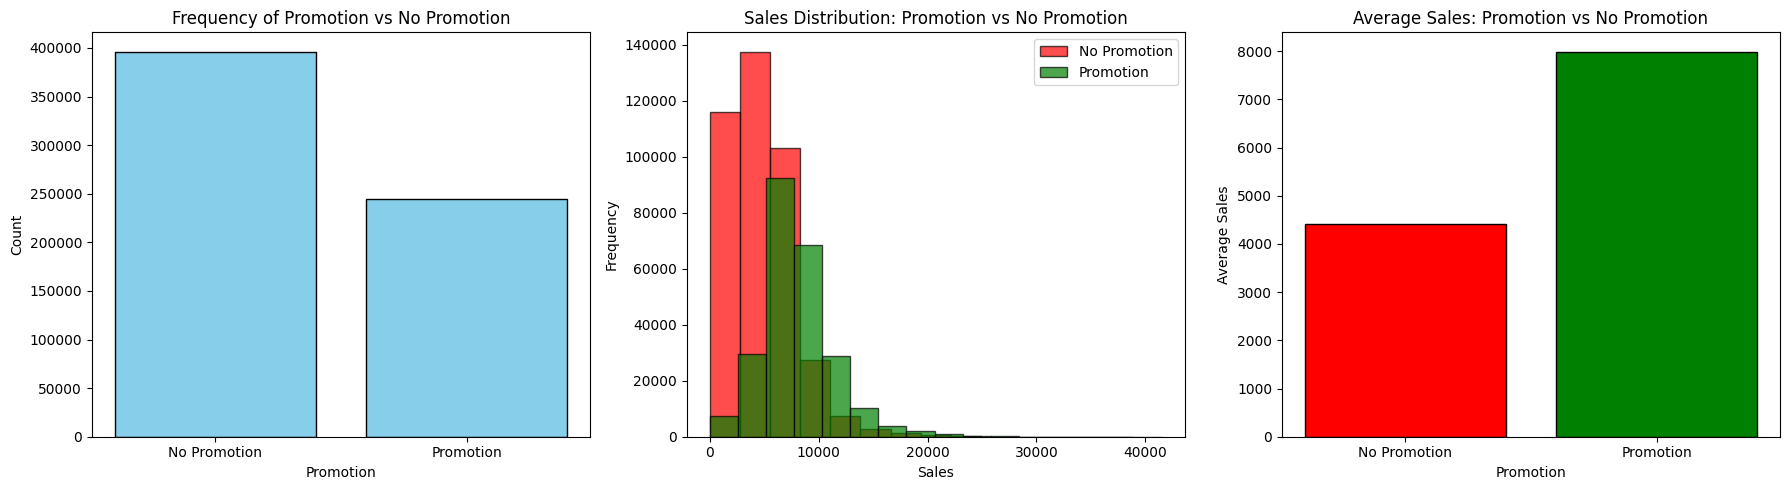

In [32]:
#Plot binary categoricals
#Promotion
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Plot frequency
promotion_counts = sales_data['promotion'].value_counts()
axes[0].bar(promotion_counts.index, promotion_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title("Frequency of Promotion vs No Promotion")
axes[0].set_xlabel("Promotion")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No Promotion", "Promotion"])
axes[0].set_ylabel("Count")

#Plot sales distribution
sales_promotion = sales_data[sales_data['promotion'] == 1]['sales']
sales_no_promotion = sales_data[sales_data['promotion'] == 0]['sales']
axes[1].hist(sales_no_promotion, bins=15, alpha=0.7, label="No Promotion", color="red", edgecolor="black")
axes[1].hist(sales_promotion, bins=15, alpha=0.7, label="Promotion", color="green", edgecolor="black")
axes[1].set_title("Sales Distribution: Promotion vs No Promotion")
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("Frequency")
axes[1].legend()

#Plot average sales
average_sales = sales_data.groupby('promotion')['sales'].mean()
axes[2].bar(average_sales.index, average_sales.values, color=['red', 'green'], edgecolor='black')
axes[2].set_title("Average Sales: Promotion vs No Promotion")
axes[2].set_xlabel("Promotion")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["No Promotion", "Promotion"])
axes[2].set_ylabel("Average Sales")

#Adjust layout
plt.tight_layout()
plt.show()

## Promotion vs No Promotion Distribution
1. Promotion vs. No Promotion Frequency: The first bar plot shows that promotions occur less frequently than no promotions.

2. Sales Distribution During Promotions: The second plot reveals that sales tend to be higher when there are no promotions. This could be due to factors such as customer loyalty, targeted promotions for specific products, or the timing of the promotional periods.

3. Average Sales with Promotions: Despite the lower frequency of promotions, the third plot shows that average sales increase during promotions, suggesting that promotions do, in fact, boost sales when they occur.

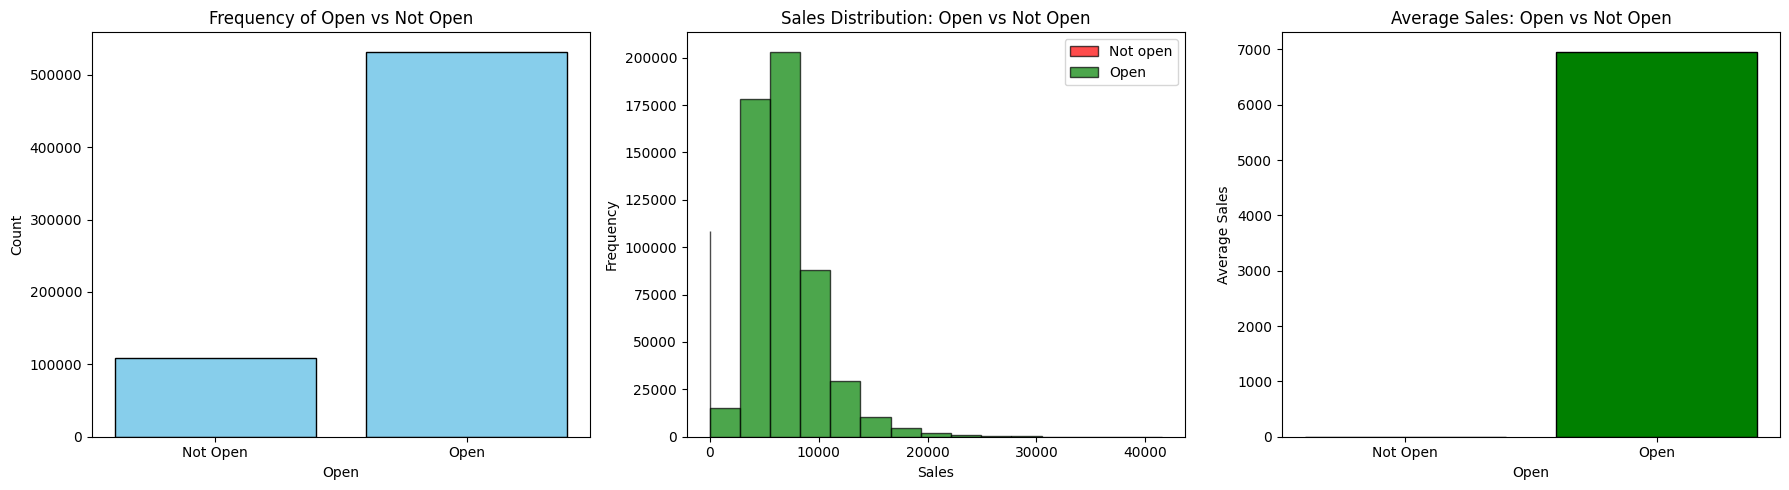

In [35]:
#Plot binary categoricals
#Open
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Plot frequency
open_counts = sales_data['open'].value_counts()
axes[0].bar(open_counts.index, open_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title("Frequency of Open vs Not Open")
axes[0].set_xlabel("Open")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not Open", "Open"])
axes[0].set_ylabel("Count")

#Plot sales distribution
sales_promotion = sales_data[sales_data['open'] == 1]['sales']
sales_no_promotion = sales_data[sales_data['open'] == 0]['sales']
axes[1].hist(sales_no_promotion, bins=15, alpha=0.7, label="Not open", color="red", edgecolor="black")
axes[1].hist(sales_promotion, bins=15, alpha=0.7, label="Open", color="green", edgecolor="black")
axes[1].set_title("Sales Distribution: Open vs Not Open")
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("Frequency")
axes[1].legend()

#Plot average sales
average_sales = sales_data.groupby('open')['sales'].mean()
axes[2].bar(average_sales.index, average_sales.values, color=['red', 'green'], edgecolor='black')
axes[2].set_title("Average Sales: Open vs Not Open")
axes[2].set_xlabel("Open")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["Not Open", "Open"])
axes[2].set_ylabel("Average Sales")

#Adjust layout
plt.tight_layout()
plt.show()

## Open vs Not Open Frequency

1. Store Open vs. Closed Frequency: The first plot shows that stores were mostly open, with closures being rare, likely due to factors like holidays or isolated incidents.

2. Sales Distribution When Stores Are Open: The second plot confirms that sales only occurred when the stores were open, which makes sense given that sales typically happen during operational hours.

3. Sales During Store Closures: The third plot shows no sales occurred when stores were closed, supporting the assumption that all sales were made in physical stores and not online.

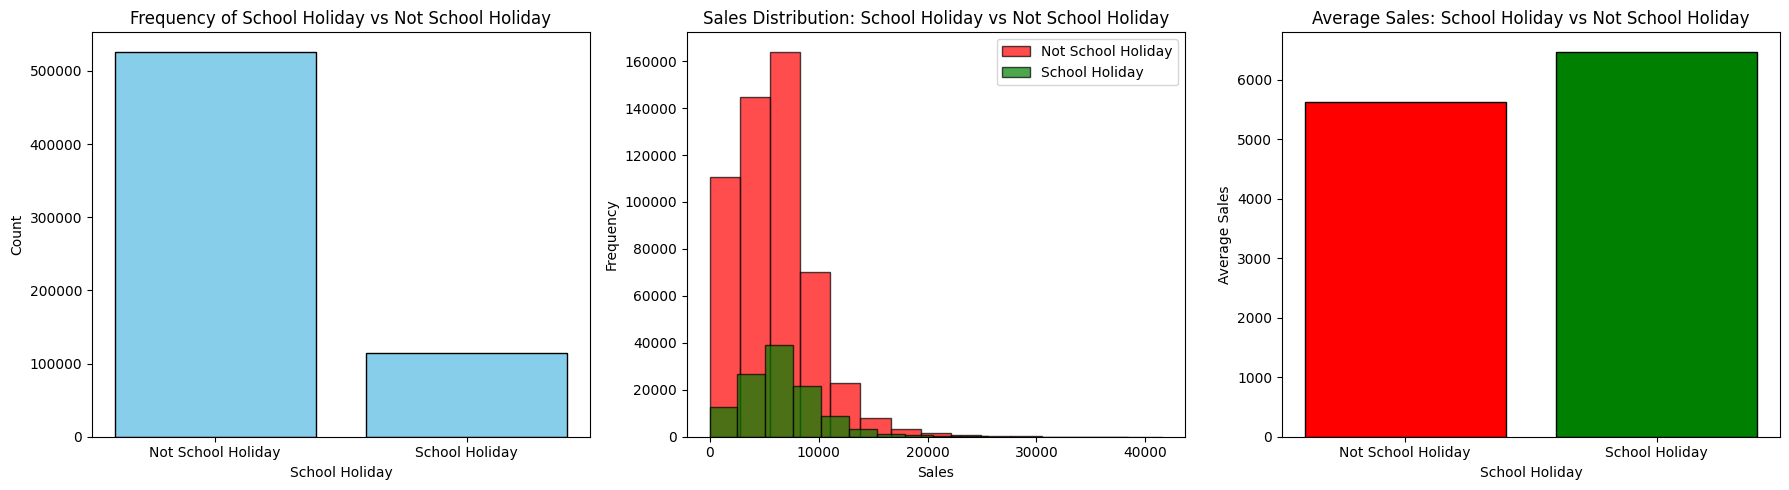

In [39]:
#Plot binary categoricals
#School Holiday
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Plot frequency
school_holiday_counts = sales_data['school_holiday'].value_counts()
axes[0].bar(school_holiday_counts.index, school_holiday_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title("Frequency of School Holiday vs Not School Holiday")
axes[0].set_xlabel("School Holiday")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Not School Holiday", "School Holiday"])
axes[0].set_ylabel("Count")

#Plot sales distribution
sales_promotion = sales_data[sales_data['school_holiday'] == 1]['sales']
sales_no_promotion = sales_data[sales_data['school_holiday'] == 0]['sales']
axes[1].hist(sales_no_promotion, bins=15, alpha=0.7, label="Not School Holiday", color="red", edgecolor="black")
axes[1].hist(sales_promotion, bins=15, alpha=0.7, label="School Holiday", color="green", edgecolor="black")
axes[1].set_title("Sales Distribution: School Holiday vs Not School Holiday")
axes[1].set_xlabel("Sales")
axes[1].set_ylabel("Frequency")
axes[1].legend()

#Plot average sales
average_sales = sales_data.groupby('school_holiday')['sales'].mean()
axes[2].bar(average_sales.index, average_sales.values, color=['red', 'green'], edgecolor='black')
axes[2].set_title("Average Sales: School Holiday vs Not School Holiday")
axes[2].set_xlabel("School Holiday")
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(["Not School Holiday", "School Holiday"])
axes[2].set_ylabel("Average Sales")

#Adjust layout
plt.tight_layout()
plt.show()

## School Holiday vs No School Holiday
1. The first bar plot for the "school_holiday" column shows there were more regular days than school holidays, which is expected, as there are fewer school holidays compared to regular days during the year.
2. On the second graph we can observe that for the sales distribution, the frequency of sales happened mostly on regular day rather than on school days
3. On the thrid graph, we do see, however, that sales on average increased a bit when there was a school holiday, this could've been due to seasonality and holidays where shopping tends to increase.

C:\Users\Jarian\AppData\Local\Temp\ipykernel_44572\1603992221.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_store_IDs.index, y=top_store_IDs.values, palette='deep')


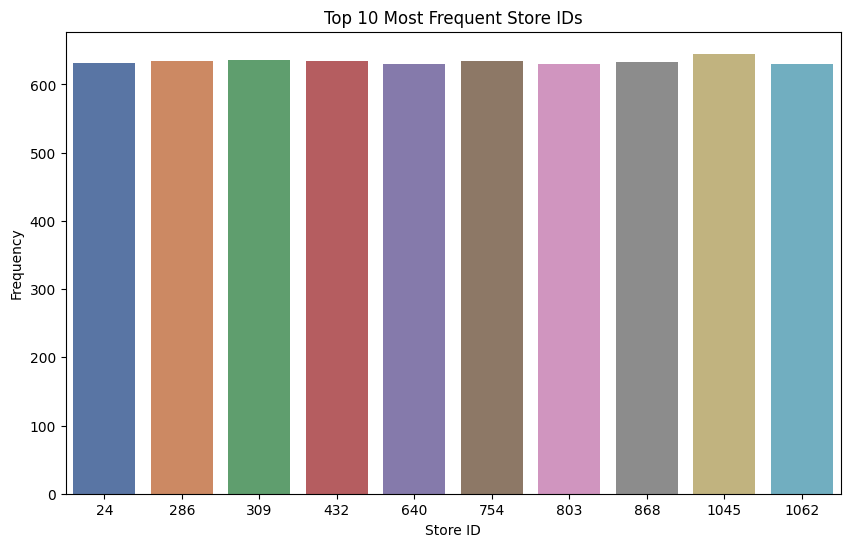

In [42]:
#Multi class categories
#Store ID(Top 10 stores)
top_store_IDs = sales_data['store_ID'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_store_IDs.index, y=top_store_IDs.values, palette='deep')
plt.title("Top 10 Most Frequent Store IDs")
plt.xlabel("Store ID")
plt.ylabel("Frequency")
plt.show()

## Store ID
The bar plot above displays the top 10 most frequently visited stores in the dataset. Given the large number of unique stores, limiting the display to the top 10 helps provide a clearer view of the most prominent locations in the data.

C:\Users\Jarian\AppData\Local\Temp\ipykernel_44572\2508433688.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=sales_data, palette='deep')


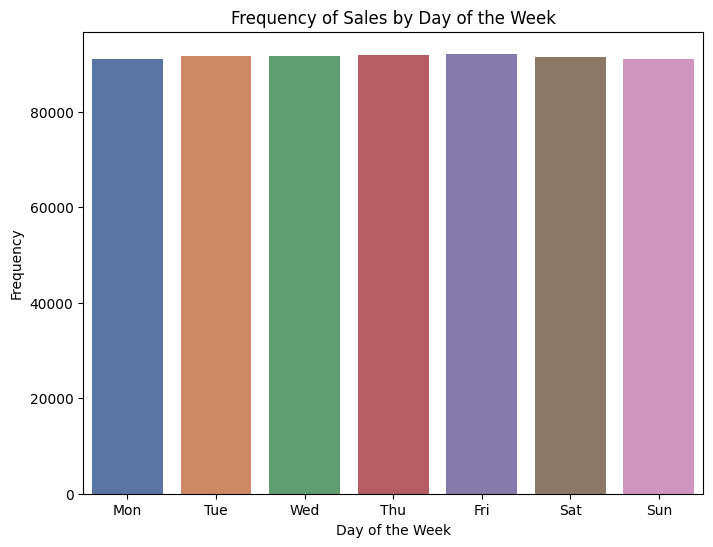

In [45]:
#Multi class categories
#Day of week
plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_week', data=sales_data, palette='deep')
plt.title("Frequency of Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Frequency")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

## Day of the Week Sales Analysis:
1. Most Sales Occurred on Fridays: The highest frequency of sales occurred on Fridays at 92,138, although the difference between days is relatively small.

2. Uniformity Across Days: Overall, sales are fairly evenly distributed across the week, with only slight variations between days. This suggests that there might not be a strong preference for sales on certain days of the week.

3. Possible Factors: The minor differences in sales across days might be attributed to operational factors such as store-specific promotions, customer shopping patterns, or even external influences like special events or regional holidays that are not captured in this dataset.

C:\Users\Jarian\AppData\Local\Temp\ipykernel_44572\411951822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='state_holiday', data=sales_data, palette='deep')


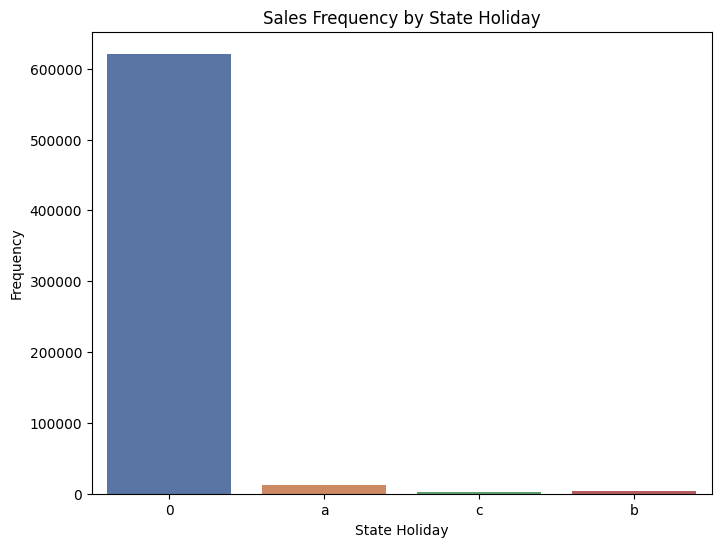

In [48]:
#Multi class categories
#State holiday
plt.figure(figsize=(8, 6))
sns.countplot(x='state_holiday', data=sales_data, palette='deep')
plt.title("Sales Frequency by State Holiday")
plt.xlabel("State Holiday")
plt.ylabel("Frequency")
plt.show()

## State Holiday Analysis
1. Dominance of Regular Days (0): The majority of the sales occurred on regular days, which is expected since there are typically more non-holiday days than holidays in any given period.

2. Low Frequency of State Holidays: The holidays labeled as 'a', 'b', and 'c' represent a much smaller percentage of the data, which may indicate that state holidays are less frequent in this dataset, or that they represent specific local or regional holidays.

3. Limited Impact on Sales: Since the holidays only account for a small fraction of the data, any conclusions about the impact of state holidays on sales should consider the possibility that holidays have a limited effect in this dataset, or that other factors may be driving sales during these days.

C:\Users\Jarian\AppData\Local\Temp\ipykernel_44572\1856014468.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year_quarter', y='sales', data=quarterly_sales, palette='muted')


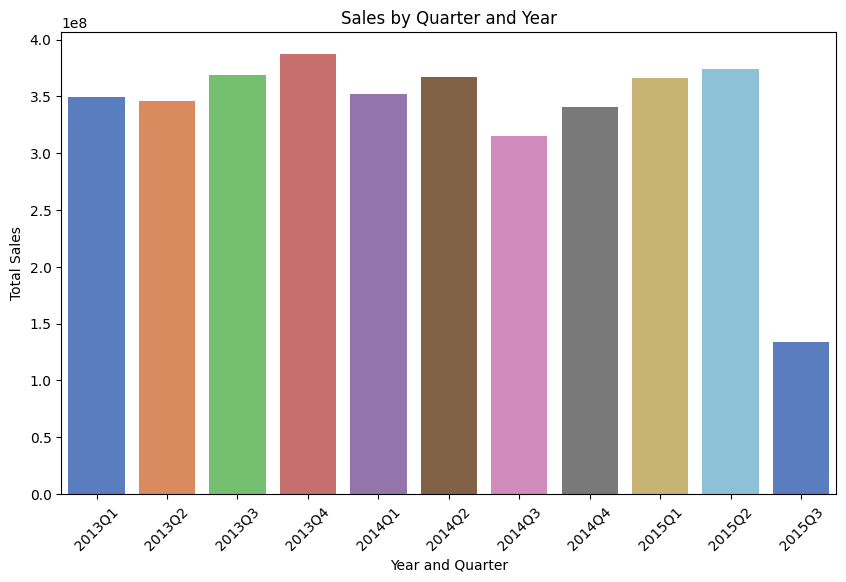

In [51]:
#Ensure 'date' column is in datetime format
sales_data['date'] = pd.to_datetime(sales_data['date'])

#Create a new column for year and quarter
sales_data['year_quarter'] = sales_data['date'].dt.to_period('Q')

#Group by year and quarter, and get the sum of sales (or count of occurrences)
quarterly_sales = sales_data.groupby('year_quarter')['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='year_quarter', y='sales', data=quarterly_sales, palette='muted')
plt.title("Sales by Quarter and Year")
plt.xlabel("Year and Quarter")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

## Date Analysis
For better visualization, the dates from the dataset have been divided into quarters and plotted by their years.
Here is a legend:

1. Q1 - Jan, Feb, Mar
2. Q2 - Apr, May, Jun
3. Q3 - Jul, Aug, Sep
4. Q4 - Oct, Nov, Dec

That being said, we can see that for the year 2013, Q3 and Q4 had the most sales, perhaps due to the holiday sales starting to ramp up. This is typical as Q4 (holiday season) often results in a significant sales boost in retail, and Q3 could be driven by back-to-school shopping, which also drives consumer spending.

For the year 2014, Q2 had the most sales, likely due to the summer season quickly approaching. Consumer behavior in Q2 is often driven by vacations, travel, and leisure activities, all of which tend to lead to higher sales. Q4 also saw a rise in sales, which is expected during the holiday season, where retail often experiences a sharp increase in sales.

Lastly, for the year 2015, we only have data for three quarters due to the year still occurring in this particular dataset. Again, Q2 had the highest sales, likely due to spring break and the summer season. We observe that Q3 had the lowest sales, but this might be due to the year not yet being complete. Sales could be higher in Q3 once the full data is available, as some factors like promotions or external events could still influence sales as the year progresses. To better determine how well sales would perform in 2015, we would have to see the data through to the end of Q4, which hasn’t started yet.

In [54]:
#Further observations: More promotions falling on the holiday seasons
#November, December (Christmas), February (Valentines day), April (Easter), Summer(Fourth of July),etc.

In [56]:
#Further observations: Promotions being timed around school holidays

In [58]:
#Drop unamed column, no significant data in columns that is needed for the model
sales_data.drop(columns=['Unnamed: 0'], inplace=True)

In [60]:
sales_data.drop(columns=['year_quarter'], inplace=True)

In [62]:
sales_data.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882


In [64]:
#Feature engineering 
#Convert 'date' to datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

#Extract meaningful date features
sales_data['year'] = sales_data['date'].dt.year
sales_data['month'] = sales_data['date'].dt.month
sales_data['day_of_month'] = sales_data['date'].dt.day
sales_data['is_weekend'] = (sales_data['day_of_week'] >= 6).astype(int)  # 1 if Saturday/Sunday

#Drop the original 'date' column
sales_data.drop(columns=['date'], inplace=True)

In [66]:
sales_data.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day_of_month,is_weekend
0,366,4,517,1,0,0,0,4422,2013,4,18,0
1,394,6,694,1,0,0,0,8297,2015,4,11,1
2,807,4,970,1,1,0,0,9729,2013,8,29,0
3,802,2,473,1,1,0,0,6513,2013,5,28,0
4,726,4,1068,1,1,0,0,10882,2013,10,10,0


In [68]:
#OneHotEncode the categorical values to numerics so the model can use them
encoder = OneHotEncoder(sparse_output=False)

#Get categorical columns
categorical_cols = sales_data[['store_ID', 'day_of_week', 'state_holiday']]

#Encode the data
encoded_data = encoder.fit_transform(categorical_cols)

#Create df with encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

#Concatenate encoded df to the original df (drop original categorical columns)
sales_data_encoded = pd.concat([sales_data.drop(columns=['store_ID', 'day_of_week', 'state_holiday']), encoded_df], axis=1)

In [70]:
sales_data_encoded.head()

,nb_customers_on_day,open,promotion,school_holiday,sales,year,month,day_of_month,is_weekend,store_ID_1,...,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
0,517,1,0,0,4422,2013,4,18,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,694,1,0,0,8297,2015,4,11,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,970,1,1,0,9729,2013,8,29,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,473,1,1,0,6513,2013,5,28,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1068,1,1,0,10882,2013,10,10,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Why Encode store_ID, day_of_week, and state_holiday?
store_ID: This column represents different stores, each identified by a unique ID. Since machine learning algorithms can't interpret categorical variables directly, we need to encode this information into numerical form. By encoding store_ID, we treat each store as a separate category, allowing the model to better understand and differentiate between them.

day_of_week: This column indicates the day of the week using an integer (e.g., 1 for Sunday, 7 for Saturday). While this is technically numeric, it represents a categorical feature with a fixed set of possible values. Encoding it allows the model to treat each day as a distinct category, making it more useful for analysis and prediction.

state_holiday: This column contains categorical values such as a, b, c, and 0, representing different types of holidays. Encoding these categories ensures that the model can distinguish between the different types of holidays, which may have varying impacts on sales or customer behavior.

## Why Not Encode Other Columns?
Numerical Columns (e.g., nb_customers_on_day, sales, open): These columns are numerical by nature and represent quantities (e.g., number of customers, sales value). Since they contain continuous data or binary data (e.g., open), they are better left as numerical values for correlation analysis or direct use in models. Encoding these would lose the meaningful numerical relationship between the values.

date: Dates have a continuous nature, which means encoding them as categorical variables would obscure their inherent time-based patterns. Rather than encoding the date column, it's more useful to extract meaningful features like year, month, and day or use it in time-based analysis. This way, we can retain the time-related information while still leveraging the value of the date feature.

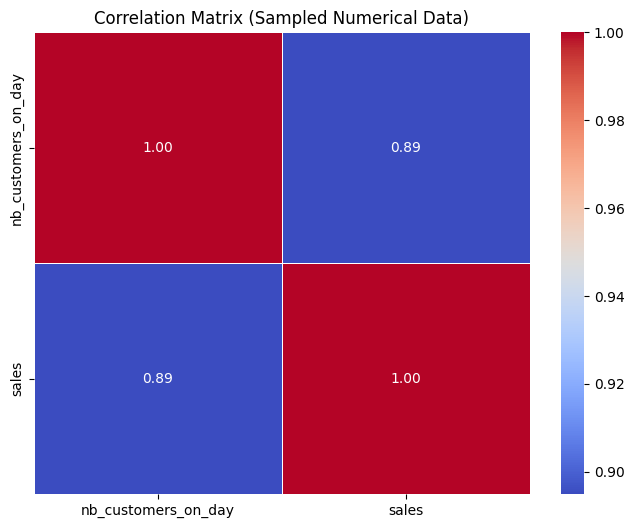

In [73]:
#Visualize correlation between numericals with heatmap
#Select only the numerical columns for correlation
numerical_data = sales_data[['nb_customers_on_day', 'sales']]

#Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

#Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Sampled Numerical Data)")
plt.show()

In [75]:
#Normalize data
#Handle Kurtosis by applying log transformation to the target variable
sales_data_encoded['log_customers'] = np.log1p(sales_data_encoded['nb_customers_on_day'])

In [77]:
#Normalize the data if needed
#Initialize scaler
scaler = StandardScaler()

#Scale only the 'nb_customers_on_day' column in the encoded DataFrame
sales_data_encoded['scaled_customers'] = scaler.fit_transform(sales_data_encoded[['nb_customers_on_day']])

#Drop the original 'nb_customers_on_day' column, no longer needed
sales_data_encoded.drop(columns=['nb_customers_on_day'], inplace=True)

## Why scale/normalize the number of customers on day column?
The standard deviation revealed significant fluctuations in customer counts throughout the week. This variation is common in real-world business data, but it can pose challenges for machine learning models. High variability in the data can cause certain models, especially those sensitive to the scale of input features, to underperform. By scaling or normalizing the data, we ensure that the model treats all input features equally, improving its performance and allowing for more stable training.

In [80]:
sales_data_encoded.head()

,open,promotion,school_holiday,sales,year,month,day_of_month,is_weekend,store_ID_1,store_ID_2,...,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c,log_customers,scaled_customers
0,1,0,0,4422,2013,4,18,0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.249975,-0.250808
1,1,0,0,8297,2015,4,11,1,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.543912,0.130580
2,1,1,0,9729,2013,8,29,0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.878326,0.725287
3,1,1,0,6513,2013,5,28,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.161207,-0.345617
4,1,1,0,10882,2013,10,10,0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.974479,0.936451


In [82]:
#Seperate Features(inputs) and Target(outputs)
X = sales_data_encoded.drop('sales', axis=1)
y = sales_data_encoded['sales']

In [84]:
#Train, test, split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model and Calculate metrics

In [87]:
#Use Regression models for sales predictions

In [89]:
#Train a Linear Regression model
lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = MAE(y_test, lr_pred)
print(f"Linear Regression - R2: {lr_r2}, MAE: {lr_mae}")

Linear Regression - R2: 0.9562089982254777, MAE: 559.9207211982216


In [91]:
#Create a naive baseline model that predicts the mean of the training target ('sales') for all test instances
#Calculate the Mean Absolute Error (MAE) between the baseline predictions and actual test values

baseline_pred = np.full_like(y_test, np.mean(y_train), dtype=np.float64)
baseline_mae = MAE(y_test, baseline_pred)

print(f"Baseline Mean Absolute Error: {baseline_mae}")

Baseline Mean Absolute Error: 2884.6388282325497


# Use real life data

In [96]:
#Load data
real_sales = pd.read_csv("REAL_DATA.csv")

In [98]:
#Preview df
real_sales.head()

,index,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,272371,415,7,01/03/2015,0,0,0,0,0
1,558468,27,7,29/12/2013,0,0,0,0,0
2,76950,404,3,19/03/2014,657,1,1,0,0
3,77556,683,2,29/01/2013,862,1,0,0,0
4,456344,920,3,19/03/2014,591,1,1,0,0


In [100]:
#Drop unamed column, no significant data in columns that is needed for the model
real_sales.drop(columns=['index'], inplace=True)

In [104]:
#Feature engineering 
#Convert 'date' to datetime
real_sales['date'] = pd.to_datetime(real_sales['date'], dayfirst=True)

#Extract meaningful date features
real_sales['year'] = real_sales['date'].dt.year
real_sales['month'] = real_sales['date'].dt.month
real_sales['day_of_month'] = real_sales['date'].dt.day
real_sales['is_weekend'] = (real_sales['day_of_week'] >= 6).astype(int)  # 1 if Saturday/Sunday

#Drop the original 'date' column
real_sales.drop(columns=['date'], inplace=True)

In [106]:
#OneHotEncode the categorical values to numerics so the model can use them
encoder = OneHotEncoder(sparse_output=False)

#Get categorical columns
categorical_cols = real_sales[['store_ID', 'day_of_week', 'state_holiday']]

#Encode the data
encoded_data = encoder.fit_transform(categorical_cols)

#Create df with encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

#Concatenate encoded df to the original df (drop original categorical columns)
real_sales_encoded = pd.concat([real_sales.drop(columns=['store_ID', 'day_of_week', 'state_holiday']), encoded_df], axis=1)

In [108]:
#Normalize data
#Handle Kurtosis by applying log transformation to the target variable
real_sales_encoded['log_customers'] = np.log1p(real_sales_encoded['nb_customers_on_day'])

In [110]:
scaler = StandardScaler()

#Scale only the 'nb_customers_on_day' column in the encoded DataFrame
real_sales_encoded['scaled_customers'] = scaler.fit_transform(real_sales_encoded[['nb_customers_on_day']])

#Drop the original 'nb_customers_on_day' column, no longer needed
real_sales_encoded.drop(columns=['nb_customers_on_day'], inplace=True)

In [112]:
real_sales_encoded.head()

,open,promotion,school_holiday,year,month,day_of_month,is_weekend,store_ID_1,store_ID_2,store_ID_3,...,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c,log_customers,scaled_customers
0,0,0,0,2015,3,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,-1.357070
1,0,0,0,2013,12,29,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,-1.357070
2,1,1,0,2014,3,19,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.489205,0.050536
3,1,0,0,2013,1,29,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.760415,0.489743
4,1,1,0,2014,3,19,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.383507,-0.090867


In [120]:
#Use model for sales predictions
feature_columns = sales_data_encoded.drop('sales', axis=1).columns

#Ensure the new dataset has the same features
X_new = real_sales_encoded[feature_columns]

#Make predictions
real_sales['sales'] = lr_model.predict(X_new)

In [124]:
real_sales.head()

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day_of_month,is_weekend,sales
0,415,7,0,0,0,0,0,2015,3,1,1,1045.289606
1,27,7,0,0,0,0,0,2013,12,29,1,-68.337180
2,404,3,657,1,1,0,0,2014,3,19,0,6080.665798
3,683,2,862,1,0,0,0,2013,1,29,0,8042.331256
4,920,3,591,1,1,0,0,2014,3,19,0,6238.781622
